<a href="https://colab.research.google.com/github/durnav/Ml-lab-exp/blob/main/fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
  
df = pd.read_csv('fraud.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df["distance_from_last_transaction"]=df["distance_from_last_transaction"].fillna(value=df["distance_from_last_transaction"].mode()[0])
  

In [ ]:
df["ratio_to_median_purchase_price"]=df["ratio_to_median_purchase_price"].fillna(value=df["ratio_to_median_purchase_price"].mode()[0])

In [ ]:
df["repeat_retailer"]=df["repeat_retailer"].fillna(value=df["repeat_retailer"].mode()[0])
df["used_chip"]=df["used_chip"].fillna(value=df["used_chip"].mode()[0])
df["used_pin_number"]=df["used_pin_number"].fillna(value=df["used_pin_number"].mode()[0])
df["online_order"]=df["online_order"].fillna(value=df["online_order"].mode()[0])
df["fraud"]=df["fraud"].fillna(value=df["fraud"].mode()[0])

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


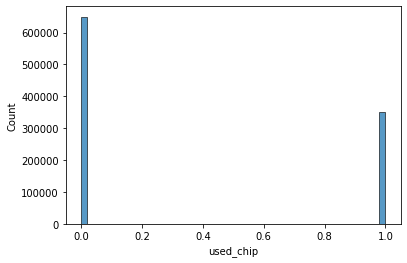

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.histplot(x='used_chip', data=df, )
plt.show()

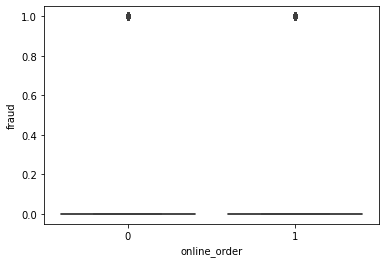

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot( x="online_order", y='fraud', data=df, )
plt.show()

In [ ]:
x = df.drop("fraud",axis=1)
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [ ]:
y = df["fraud"]

In [ ]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
157105,3.660608,0.109027,4.304168,1,0,0,1
374554,0.793127,1.554017,0.734684,0,0,0,1
688694,1.446629,1.060293,0.621182,0,0,0,1
265381,1.323360,0.468005,0.425015,0,1,0,0
955415,9.729656,12.446111,4.245820,1,1,0,1
...,...,...,...,...,...,...,...
571368,45.142392,0.636561,0.616149,1,1,0,1
444149,18.878276,5.555559,1.336313,1,1,0,1
953537,1.649568,3.696603,2.899687,0,0,1,1
466671,0.883584,3.133477,0.259212,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x =StandardScaler()
train_X = st_x.fit_transform(train_X)
test_X = st_x.transform(test_X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion ='entropy',random_state =0)
Classifier.fit(train_X,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = Classifier.predict(test_X)
print("Accuracy",metrics.accuracy_score(test_y,y_pred))

Accuracy 0.999968


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
cm

array([[456243,      4],
       [    12,  43741]])

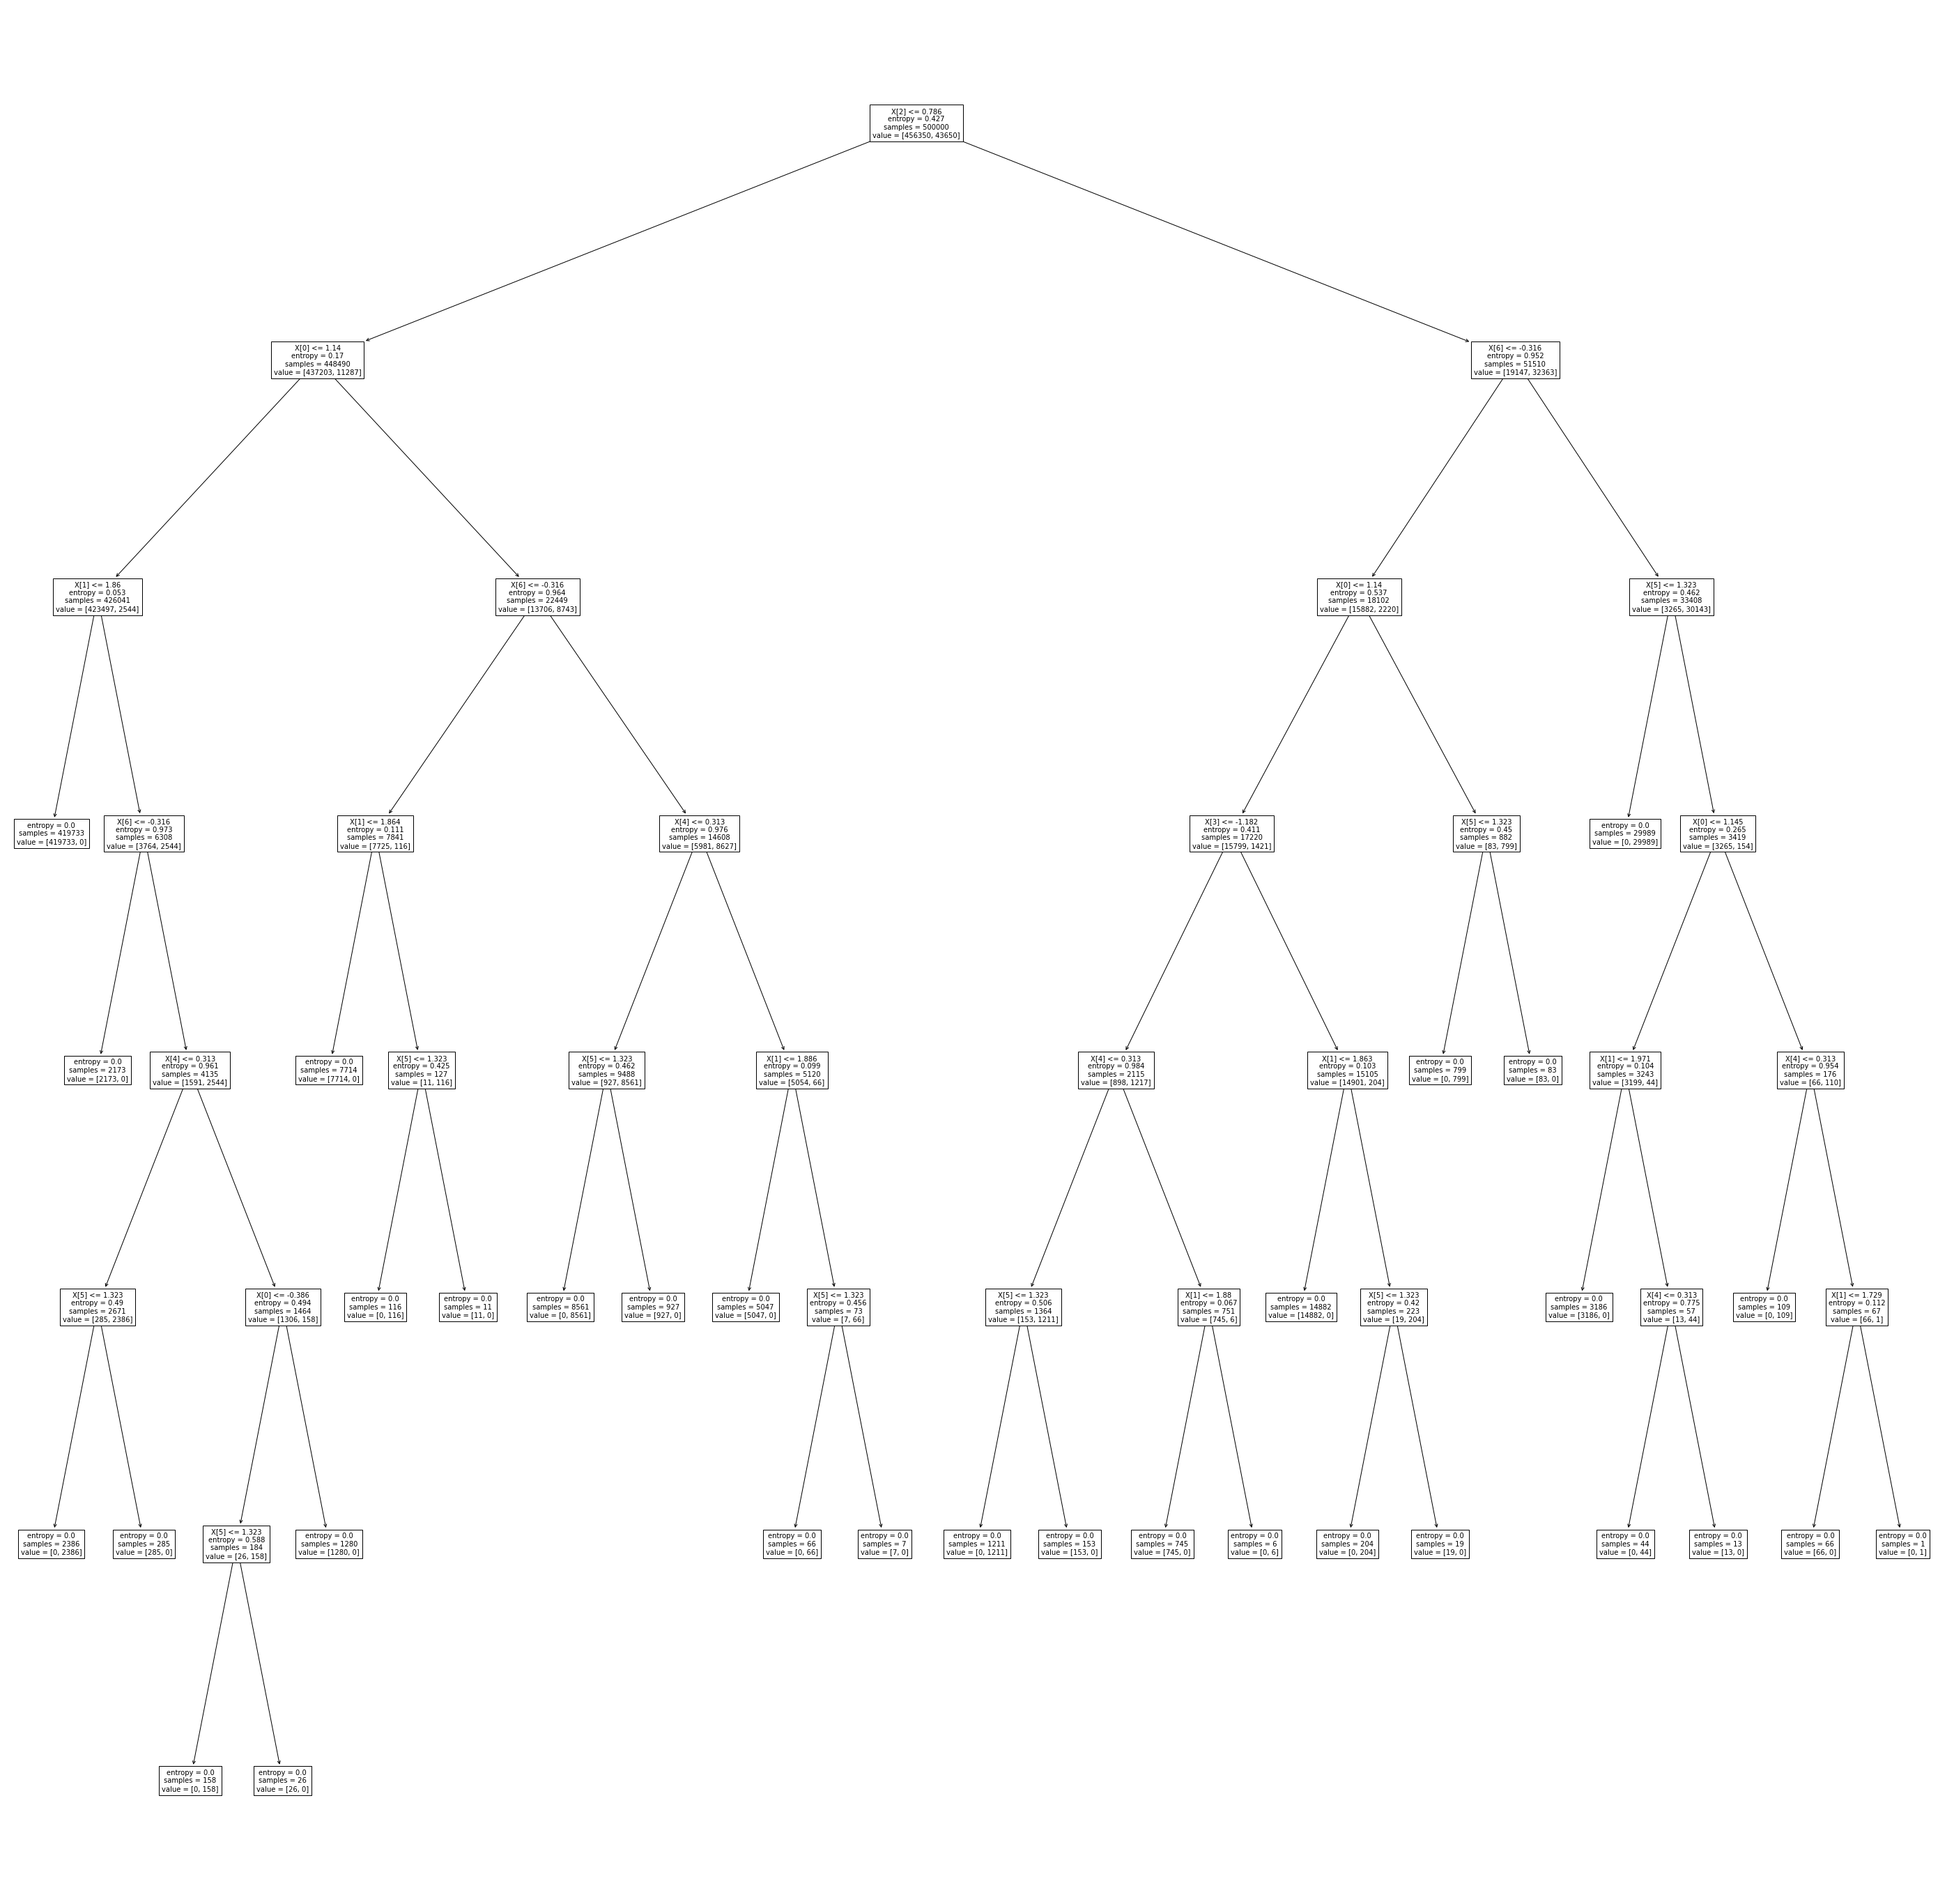

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(Classifier);


In [ ]:
from sklearn.svm import SVC
Classifier = SVC(kernel = 'rbf' , random_state =0)
Classifier.fit(train_X,train_y)

In [ ]:
y_pred = Classifier.predict(test_X)
print("Accuracy",metrics.accuracy_score(test_y,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)
model.fit(train_x,train_y)